In [1]:
import sys
import os
# sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname(__file__))))
sys.path.append('/home/ukjung18/HiG2Vec')
from hype.poincare import PoincareManifold
from hype.euclidean import EuclideanManifold
import pandas as pd
import numpy as np
import torch as th
import argparse
from sklearn.metrics import auc, roc_curve, f1_score, precision_recall_curve, precision_recall_fscore_support

/home/ukjung18/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
MANIFOLDS = {
    'euclidean': EuclideanManifold,
    'poincare': PoincareManifold
}

In [3]:
roc_list=[]
pr_list=[]
f1_list=[]

In [13]:
distfn = MANIFOLDS['poincare']().distance
df = pd.read_csv('/home/ukjung18/HiG2Vec/evalGO/HPOfull_samples.txt', header=None)
model = th.load('/home/ukjung18/HiG2Vec/result/HPOfull_d1000.pth', map_location='cpu')

objects = model['objects']
embeddings = model['embeddings']

idx_i = []
idx_j = []
msk = []
for i, (go1, go2) in enumerate(df[[0,1]].values):
    if go1 in objects and go2 in objects:
        msk.append(i)
        idx_i.append(objects.index(go1))
        idx_j.append(objects.index(go2))
yhat = (1/(1+distfn(embeddings[idx_i], embeddings[idx_j]))).tolist()
y = df.iloc[msk,2].values.tolist()
fpr, tpr, thresholds = roc_curve(y, yhat)
roc_list.append(auc(fpr, tpr))
pd.DataFrame(fpr, tpr).to_csv('fpr_tpr_hipo2vec_lr80.csv')
# print("ROC AUC: "+str(auc(fpr, tpr)))
precision, recall, thresholds = precision_recall_curve(y, yhat)
pr_list.append(auc(recall, precision))
# print("PR AUC: "+str(auc(recall, precision)))
numerator = 2 * recall * precision
denom = recall + precision
f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
max_f1 = np.max(f1_scores)
# print('Precision: ', precision)
# print('Recall: ', recall)
f1_list.append(max_f1)
# print('Best F1-Score: ', max_f1)
print(roc_list)
print(pr_list)
print(f1_list)

[0.9674729807058028, 0.9674729807058028, 0.9674729807058028, 0.9618485181987356, 0.9452869740975604, 0.9352444579767478]
[0.9689417207907334, 0.9639379925076792, 0.9688135303162169, 0.9639379925076792, 0.9475336134989938, 0.9364331441581659]
[0.9078683084446774, 0.8960112705820199, 0.9077275935074101, 0.8960112705820199, 0.8785991515479736, 0.8619209443748883]


In [7]:
import matplotlib.pyplot as plt

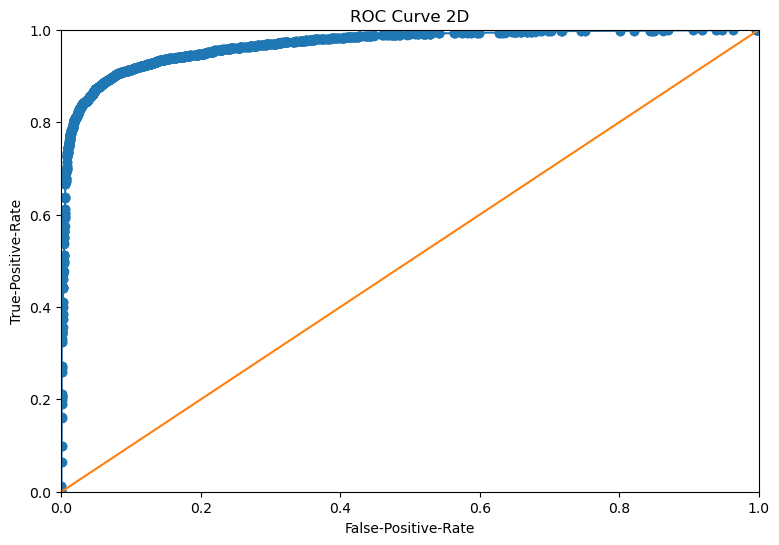

In [8]:
fig = plt.figure(figsize = (9,6))
plt.plot(fpr, tpr)
plt.scatter(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False-Positive-Rate')
plt.ylabel('True-Positive-Rate')
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('ROC Curve 2D')
plt.show()  